<a href="https://colab.research.google.com/github/IS-UNAH/AlgoritmosGeneticos_Ejemplos/blob/main/E2_GA%5BGRUPO_5%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJERCICIO #2 Algoritmo genético

---



¿Aplicar elitismo? (s/n): si
GENERACIÓN  1  LISTA.
GENERACIÓN  2  LISTA.
GENERACIÓN  3  LISTA.
GENERACIÓN  4  LISTA.
GENERACIÓN  5  LISTA.
GENERACIÓN  6  LISTA.
GENERACIÓN  7  LISTA.
GENERACIÓN  8  LISTA.
GENERACIÓN  9  LISTA.
GENERACIÓN  10  LISTA.
El maximo resultado obtenido fue:  0.8740554442911531  y lo obtuvo el:  1003851242
Corresponde con el binario:  111011110101011000110111101010


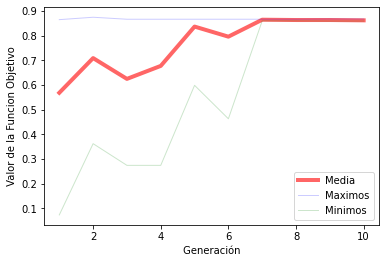

In [ ]:
import random
import matplotlib.pyplot as plt
import math
import statistics
import pandas as pd


def rellenarPoblacionInicial():
    global poblacion, cantIndividuosEnPoblacion

    for i in range(cantIndividuosEnPoblacion):
        miCadena = ""
        for i in range(30):
            r = random.uniform(0, 1)
            if(r < 0.5):
                miCadena += '0'
            else:
                miCadena += '1'
        poblacion.append(miCadena)


def rellenarFuncionesObjetivoYFitness():
    global listaFitness, listaFObjetivo, poblacion

    # rellenar F objetivo
    for i in range(len(poblacion)):
        listaFObjetivo.append(funcionObjetivo(poblacion[i]))

    # rellenar F fitness
    sumatotal = sum(listaFObjetivo)
    for i in range(len(poblacion)):
        listaFitness.append(listaFObjetivo[i]/sumatotal)


def funcionObjetivo(cromosoma):
    x = int(cromosoma, 2)
    return (x/((2**30)-1))**2


def seleccionarPareja():
    global poblacion, listaFitness

    pareja = []
    ruleta = []

    # genero la ruleta como un pool proporcional al fitness.
    for i in range(len(listaFitness)):
        if i != 0:
            ruleta.append(listaFitness[i] + ruleta[i-1])
        else:
            ruleta.append(listaFitness[i])

    # elijo cada uno de los padres.
    for veces in range(2):
        r = random.uniform(0, 1)
        indice = 404

        for i in range(len(ruleta)):
            if i == 0:
                if(0 <= r <= ruleta[i]):
                    indice = i
                    break
            else:
                if(ruleta[i-1] <= r <= ruleta[i]):
                    indice = i
                    break
        pareja.append(poblacion[indice])

    return pareja


def crossover(padres):
    global p_crossover
    hijo1 = ""
    hijo2 = ""
    # recibo los padres como string
    padre1 = padres[0]
    padre2 = padres[1]

    r = random.uniform(0, 1)
    if(r <= p_crossover):

        # elijo el punto de crossover.
        punto = round(random.uniform(0, len(padre1)-1))

        for i in range(punto):
            hijo1 = hijo1 + padre1[i]
            hijo2 = hijo2 + padre2[i]
        for i in range(punto, len(padre1)):
            hijo1 = hijo1 + padre2[i]
            hijo2 = hijo2 + padre1[i]

        return [hijo1, hijo2]
    else:
        return [padre1, padre2]


def mutacion(hijo):
    global p_mutacion

    r = random.uniform(0, 1)
    if (r <= p_mutacion):
        # recibo el hijo como string y lo paso a lista para poder editarlo en un indice.
        hijo = list(hijo)

        indice = round(random.uniform(0, len(hijo)-1))

        if (hijo[indice] == '0'):
            hijo[indice] = '1'
        else:
            hijo[indice] = '0'

        # paso la lista binaria a un string
        string = ""
        for i in range(len(hijo)):
            string = string + hijo[i]
        hijo = string

    return hijo

# Elitismo: Porcentaje de mejores individuos de la población actual que pasan directamente a la siguiente población.
def elitismo():
    global poblacion, listaFitness, proximaGeneracion, cantElite

    # Creamos una copia de la lista fitness, elegimos el mejor, lo borramos
    # y volvemos a elegir el mejor. Luego sacamos los indices en el arreglo original.
    # y agregamos en la proximaGeneracion la poblacion en el indice de los mejores.

    indiceMejor = []
    copiaFitness = listaFitness.copy()
    for i in range(cantElite):
        mejor = max(copiaFitness)
        indiceMejor.append(listaFitness.index(mejor))
        copiaFitness.remove(mejor)

    for i in range(cantElite):
        proximaGeneracion.append(poblacion[indiceMejor[i]])

#
# ------------------- Definiciones de variables ------------------- # 
# arreglo para las graficas
ejex = []
medias = []
maximos = []
minimos = []
maximos_en_binario = []
mejor_de_todos = 0

# Poblacion
poblacion = []
proximaGeneracion = []

# Lista F objetivo y F Fitness.
listaFObjetivo = []
listaFitness = []

# Parametros.
cantMaximaGeneraciones = 10
# probabilidades
p_crossover = 0.9
p_mutacion = 0.05
cantIndividuosEnPoblacion = 10


# ------------------- Comienzo del programa ------------------- #


hayElitismo = input("¿Aplicar elitismo? (s/n): ")
if(hayElitismo.lower() == 's'):
    hayElitismo = True
    cantElite = 2
else:
    hayElitismo = False
    cantElite = 0

rellenarPoblacionInicial()
rellenarFuncionesObjetivoYFitness()

terminado = False
cantidadCiclos = 0

while (terminado == False):
    cantidadCiclos = cantidadCiclos+1
    print("GENERACIÓN ", cantidadCiclos, " LISTA.")

    if(hayElitismo):
        elitismo()

    for i in range(int((len(poblacion)-cantElite)/2)):
    
        # seleccionar 2 individuos para el cruce
        padres = seleccionarPareja()
        # cruzar con cierta probabilidad 2 individuos y obtener descendientes
        hijos = crossover(padres)
        # Mutar con cierta probabilidad
        hijomutado1 = mutacion(hijos[0])
        hijomutado2 = mutacion(hijos[1])
        # Insertar descendientes en la proxima generacion
        proximaGeneracion.append(hijomutado1)
        proximaGeneracion.append(hijomutado2)

    poblacion = proximaGeneracion.copy()
    proximaGeneracion = []
    listaFObjetivo = []
    listaFitness = []

    # rellena funcion fitness y objetivo.
    rellenarFuncionesObjetivoYFitness()

    # actualizo los arreglos para las graficas
    ejex.append(cantidadCiclos)
    medias.append(statistics.mean(listaFObjetivo))
    maximos.append(max(listaFObjetivo))
    minimos.append(min(listaFObjetivo))
    mejor_de_todos = max([mejor_de_todos, max(listaFObjetivo)])

    # - calculo el mejor de esta generacion en binario.
    # veo en que indice está el maximo de la FObj.
    indice_maximo = listaFObjetivo.index(max(listaFObjetivo))
    # busco en la poblacion en ese indice.
    cromo_maximo_actual = poblacion[indice_maximo]
    maximos_en_binario.append(cromo_maximo_actual)

    # verifico si termina el Algoritmo.
    if(cantidadCiclos == cantMaximaGeneraciones):
        terminado = True


# Plotea las graficas.
plt.plot(ejex, medias, label='Media', linewidth=4, color="red", alpha=0.6)
plt.plot(ejex, maximos, label='Maximos', linewidth=1, color="blue", alpha=0.2)
plt.plot(ejex, minimos, label='Minimos',linewidth=1, color="green",  alpha=0.2,)
plt.legend()
plt.ylabel(' Valor de la Funcion Objetivo ')
plt.xlabel(' Generación ')

# Guardo en la grafica en un PNG.
plt.savefig("Resultado.png")

# segun la variable 'mejor_de_todos' que guarda la mejor FO calculo el mejor cromosoma
mejor_numero = round((math.sqrt(mejor_de_todos)*(pow(2, 30)-1)))
print("El maximo resultado obtenido fue: ",mejor_de_todos, " y lo obtuvo el: ", mejor_numero)
print("Corresponde con el binario: ", bin(mejor_numero).replace('0b', ''))


# guardo los datos en un excel.
filas = {
    'Generación': ejex,
    'Media': medias,
    'Maximo': maximos,
    'Binarios': maximos_en_binario,
    'Minimo': minimos
}

df = pd.DataFrame(filas, columns=[
    "Generación", "Media", "Maximo", "Binarios", "Minimo"])
df.to_excel(r"Tabla_Resultado.xlsx",
            index=False, header=True)

plt.show()